# 多段層別分析(２進木解析法、CART法)

 - 多段層別分析(AID : Automatic Interaction Detector)
 - CART : Classfication and Regression Trees

**<font color="red">サンプルサイズが大きい場合</font>**に、サンプルデータの分類を目的として、目的変数$y$の違いをできるだけ際立たせる説明変数を用いて逐次サンプルを2分割していく方法。

<div style="text-align:center">
    データ形式
</div>

| No. | $x_{1}$ | $x_{2}$ | $\cdots$ | $x_{p}$ | $y$ |
|:----:|:-----------:|:----------:|:------------:|:-----------:|:-----:|
| 1   | $x_{11}$ | $x_{12}$ | $\cdots$ | $x_{1p}$ | $y_{1}$ |
| 2   | $x_{21}$ | $x_{22}$ | $\cdots$ | $x_{2p}$ | $y_{2}$ |
| $\vdots $ | $\vdots $ | $\vdots $ | $\cdots$ | $\vdots $ | $\vdots $ |
| $i$ | $x_{i1}$ | $x_{i2}$ | $\cdots$ | $x_{ip}$ | $y_{i}$ |
| $\vdots $ | $\vdots $ | $\vdots $ | $\cdots$ | $\vdots $ | $\vdots $ |
| $n$ | $x_{n1}$ | $x_{n2}$ | $\cdots$ | $x_{np}$ | $y_{n}$ |

例えば、説明変数が$x_{1}, x_{2}, x_{3}$と3つあり、すべて量的変数(連続変数)であるとする。

まず、全サンプルを2分割する



「２つの母平均の差の検定」で用いる検定統計量tの２乗になっている。
$$
{ F }_{ 0 }=\cfrac { { \left( { \overline { y }  }_{ 1 }-{ \overline { y }  }_{ 2 } \right)  }^{ 2 } }{ V\cdot \left( \frac { 1 }{ { n }_{ 1 } } +\frac { 1 }{ { n }_{ 2 } }  \right)  } \\ V=\cfrac { ({ n }_{ 1 }-1){ \hat { \sigma  }  }_{ 1 }^{ 2 }+({ n }_{ 2 }-1){ \hat { \sigma  }  }_{ 2 }^{ 2 } }{ ({ n }_{ 1 }-1)+({ n }_{ 2 }-1) } 
$$

# 実装編

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

# データセットの読み込み
iris = load_iris()

# 説明変数 (それぞれ、がく片や花弁の幅、長さを示します)
x_arr = iris['data']
# 目的変数 (0, 1, 2 がそれぞれの品種を表します)
y_arr = iris['target']

## モデリング

 - [sklearn.tree.DecisionTreeClassifier — scikit-learn 0.19.2 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
 - [scikit-learn で決定木分析 (CART 法) – Python でデータサイエンス](https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%A7%E6%B1%BA%E5%AE%9A%E6%9C%A8%E5%88%86%E6%9E%90)
 - [決定木アルゴリズムを実装してみる - Pythonと機械学習](http://darden.hatenablog.com/entry/2016/12/15/222447)

In [20]:
from sklearn.tree import DecisionTreeClassifier # 決定木による分類機


decision_tree_clf = DecisionTreeClassifier(
                    class_weight=None, 
                    criterion='gini', 
                    max_depth=2,
                    max_features=None, 
                    max_leaf_nodes=None,
                    min_impurity_decrease=0.0, 
                    min_impurity_split=None,
                    min_samples_leaf=1, 
                    min_samples_split=2,
                    min_weight_fraction_leaf=0.0, 
                    presort=False, random_state=None,
                    splitter='best'
        )
decision_tree_clf.fit(x_arr, y_arr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 分割図の可視化

In [17]:
# 作成した決定木を可視化 (pydotplus パッケージを利用)
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz


dot_data = StringIO()
export_graphviz(decision_tree_clf, out_file=dot_data)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# PDFファイルに出力
# graph.write_png('boston_tree.png')

In [18]:
# InvocationException: GraphViz's executables not found
# とエラーが出たら以下のコマンドを実行するように！

# brew install graphviz

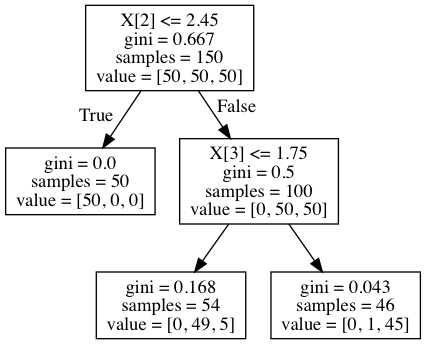

In [19]:
# ノートブックに可視化
from IPython.display import Image

Image(graph.create_png())

## データ分け

In [21]:
decision_tree_clf.predict(x_arr)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])